In [2]:
# Step 1: Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Step 2: Load the dataset (Iris dataset)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("First 5 rows of dataset:")
print(X.head())

First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# Step 3: Split dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 4: Set up hyperparameter grid for tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

In [6]:
# Step 5: Create Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Step 6: Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters found:", grid_search.best_params_)

Best Parameters found: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [7]:
# Step 7: Train the best model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [8]:
# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after tuning: {accuracy}")

Model Accuracy after tuning: 1.0


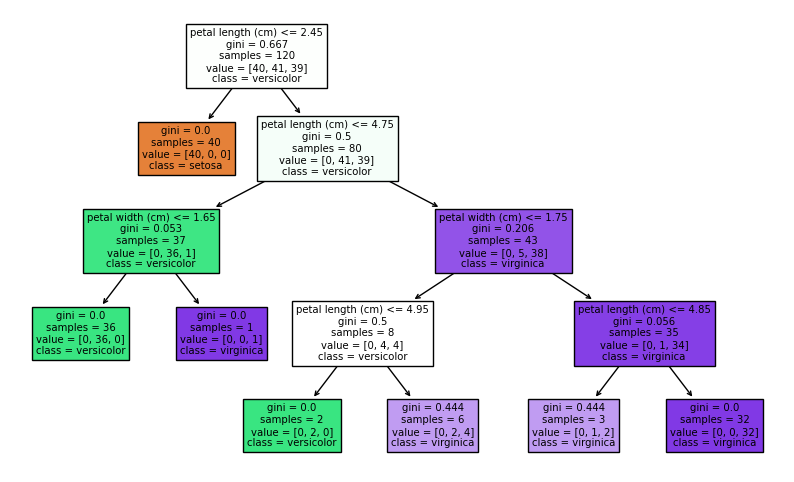

In [9]:
# Step 9: Visualize the tuned decision tree
plt.figure(figsize=(10,6))
plot_tree(best_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()